In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# load clean data
df = pd.read_csv('../data/clean/alzheimers.csv')

### Data Visualizations

In [3]:
# correlation matrix
matrix = df.corr()

# threshold
threshold = 0.2

# get all correlations with the target above threshold
matrix["Diagnosis"][matrix["Diagnosis"].abs() > threshold][matrix["Diagnosis"].abs() < 1]

ADL                    -0.332346
MMSE                   -0.237126
FunctionalAssessment   -0.364898
MemoryComplaints        0.306742
BehavioralProblems      0.224350
Name: Diagnosis, dtype: float64

All cognitive assessments are highly correlated with the Diagnosis

## Cognitive Assessment Analysis

(array([203., 233., 247., 230., 199., 179., 229., 214., 218., 197.]),
 array([-1.71287515, -1.3646513 , -1.01642744, -0.66820358, -0.31997972,
         0.02824413,  0.37646799,  0.72469185,  1.0729157 ,  1.42113956,
         1.76936342]),
 <BarContainer object of 10 artists>)

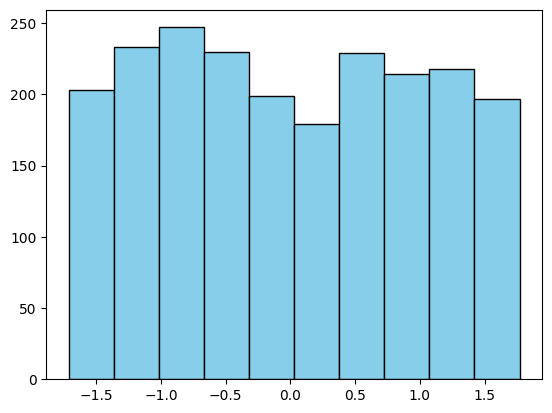

In [4]:

# MMSE distribution (pretty uniform with a dip in the middle)
plt.hist(df['MMSE'], bins=10, color='skyblue', edgecolor='black')

<Axes: xlabel='MMSE', ylabel='Proportion'>

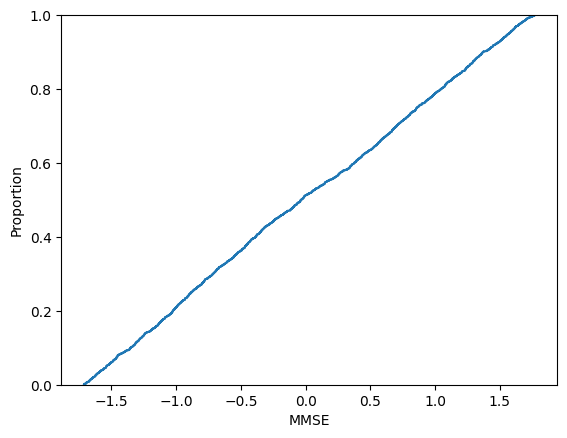

In [5]:
# ECDF
sns.ecdfplot(df["MMSE"])

MMSE is uniformly distributed

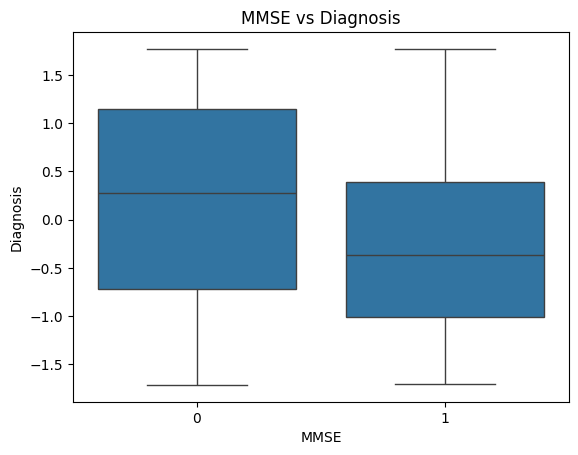

In [6]:
# MMSE vs Diagnosis boxplot

sns.boxplot(x='Diagnosis', y='MMSE', data=df)
plt.xlabel('MMSE')
plt.ylabel('Diagnosis')
plt.title('MMSE vs Diagnosis')
plt.show()

In [7]:
df.groupby('Diagnosis')['MMSE'].median()

Diagnosis
0    0.277624
1   -0.370368
Name: MMSE, dtype: float64

Patients diagnosed with Alzheimer's have lower median MMSE scores by about 6 points than those who weren't diagnosed

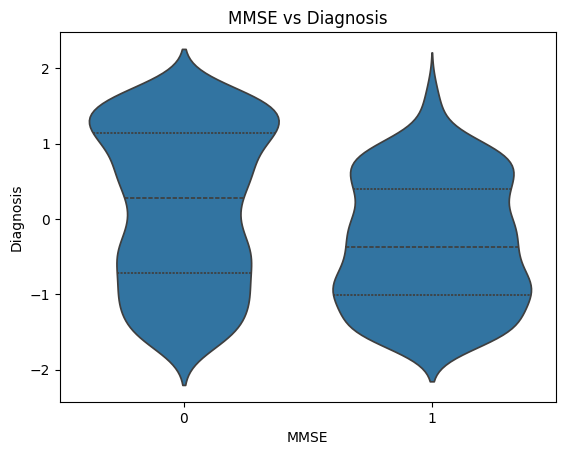

In [8]:
# violin plot

sns.violinplot(x='Diagnosis', y='MMSE', data=df, inner='quartile')
plt.xlabel('MMSE')
plt.ylabel('Diagnosis')
plt.title('MMSE vs Diagnosis')
plt.show()

(array([210., 216., 189., 201., 238., 214., 217., 219., 215., 230.]),
 array([-1.75638721, -1.41075221, -1.0651172 , -0.7194822 , -0.37384719,
        -0.02821219,  0.31742281,  0.66305782,  1.00869282,  1.35432783,
         1.69996283]),
 <BarContainer object of 10 artists>)

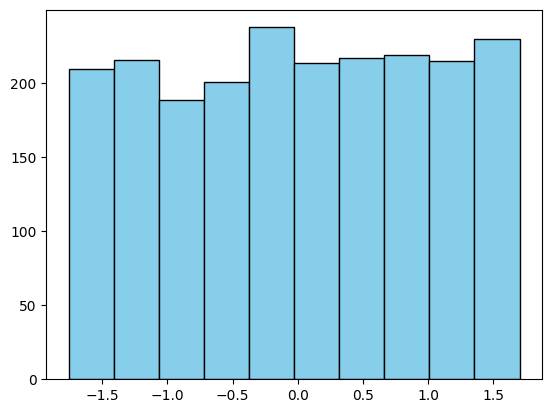

In [9]:
# FunctionalAssessment Distribution (uniform)
plt.hist(df['FunctionalAssessment'], bins=10, color='skyblue', edgecolor='black')

<Axes: xlabel='FunctionalAssessment', ylabel='Proportion'>

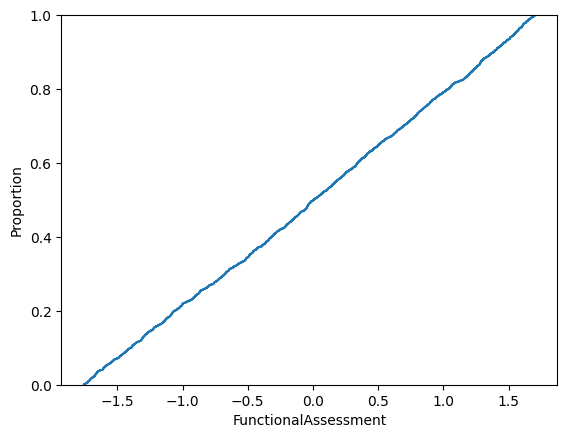

In [10]:
sns.ecdfplot(df["FunctionalAssessment"])

uniform distribution of FunctionalAssessment

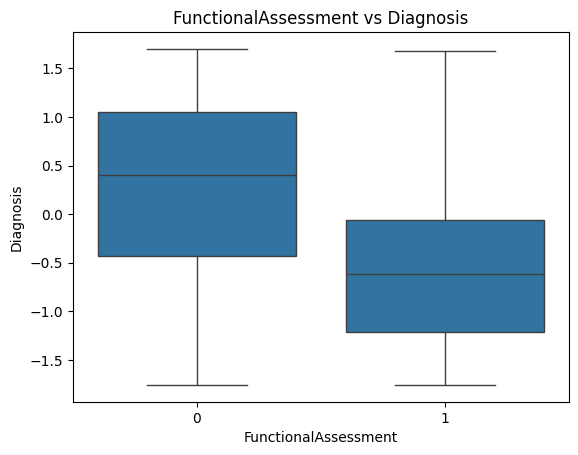

In [11]:
# FunctionalAssessment vs Diagnosis boxplot

sns.boxplot(x='Diagnosis', y='FunctionalAssessment', data=df)
plt.xlabel('FunctionalAssessment')
plt.ylabel('Diagnosis')
plt.title('FunctionalAssessment vs Diagnosis')
plt.show()

In [12]:
df.groupby('Diagnosis')['FunctionalAssessment'].median()


Diagnosis
0    0.402564
1   -0.615820
Name: FunctionalAssessment, dtype: float64

<Axes: xlabel='Diagnosis', ylabel='FunctionalAssessment'>

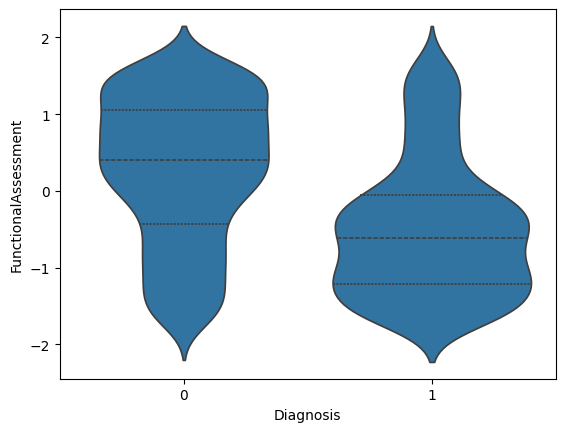

In [13]:
sns.violinplot(data=df, x="Diagnosis", y="FunctionalAssessment", inner="quartile")

50% of patients diagnosed with Alzheimer's scored less than 4 on the FunctionalAssessment scale while 50% of patients who were not diagnosed with Alzheimer's scored above 6

Text(0.5, 1.0, 'MemoryComplaints')

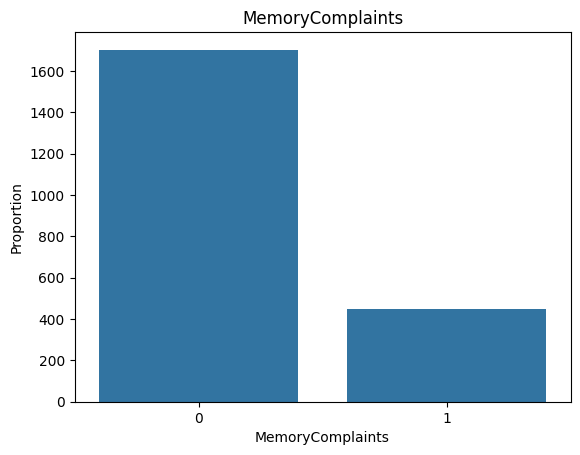

In [14]:
# MemoryComplaints countplot

sns.countplot(x='MemoryComplaints', data=df)
plt.xlabel('MemoryComplaints')
plt.ylabel('Proportion')
plt.title('MemoryComplaints')

More data points have no memory complaints than those with memory complaints
0 = no memory complaints
1 = memory complaints

<Axes: xlabel='MemoryComplaints', ylabel='Diagnosis'>

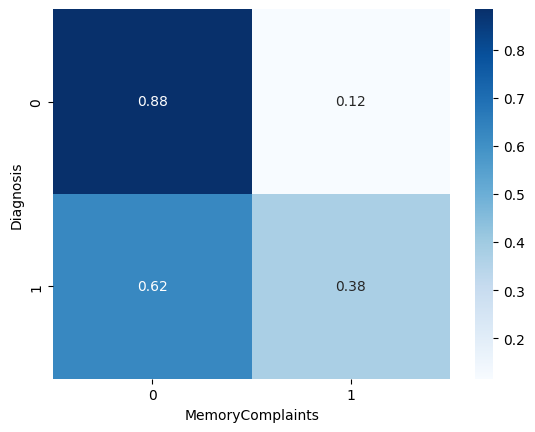

In [15]:
# crosstab heatmap with Diagnosis
cross = pd.crosstab(df["Diagnosis"], df["MemoryComplaints"], normalize="index")
sns.heatmap(cross, annot=True, fmt=".2f", cmap="Blues")


those in the no diagnosis group have a less memory complaints than those in the diagnosis group

Text(0.5, 1.0, 'BehavioralProblems')

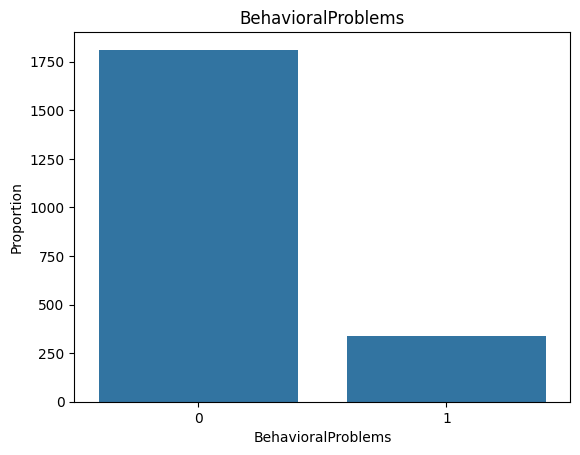

In [16]:
# BehavioralProblems countplot

sns.countplot(x='BehavioralProblems', data=df)
plt.xlabel('BehavioralProblems')
plt.ylabel('Proportion')
plt.title('BehavioralProblems')

More data points have no behavioral complaints than those with behavioral complaints

<Axes: xlabel='BehavioralProblems', ylabel='Diagnosis'>

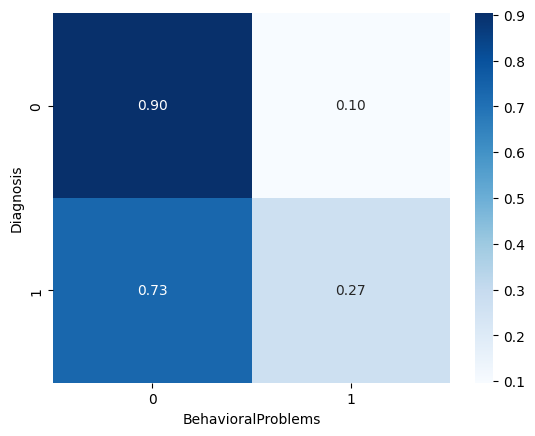

In [17]:
# crosstab heatmap
cross = pd.crosstab(df["Diagnosis"], df["BehavioralProblems"], normalize="index")
sns.heatmap(cross, annot=True, fmt=".2f", cmap="Blues")

Higher prevalence of behavioral problems in the diagnosis group than in the no diagnosis group

(array([244., 237., 169., 216., 197., 212., 196., 243., 207., 228.]),
 array([-1.68922385, -1.35018826, -1.01115268, -0.67211709, -0.3330815 ,
         0.00595409,  0.34498967,  0.68402526,  1.02306085,  1.36209643,
         1.70113202]),
 <BarContainer object of 10 artists>)

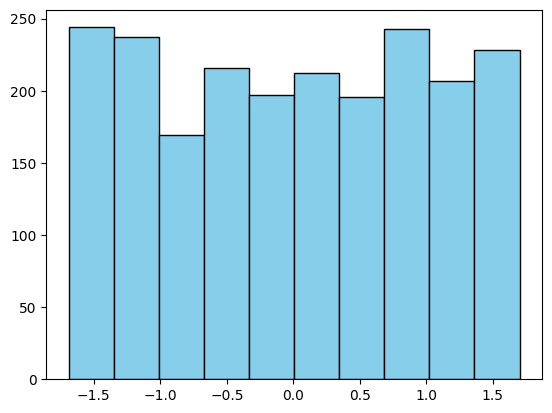

In [18]:
# Activities of Daily Living Score distribution
plt.hist(df['ADL'], bins=10, color='skyblue', edgecolor='black')

<Axes: xlabel='ADL', ylabel='Proportion'>

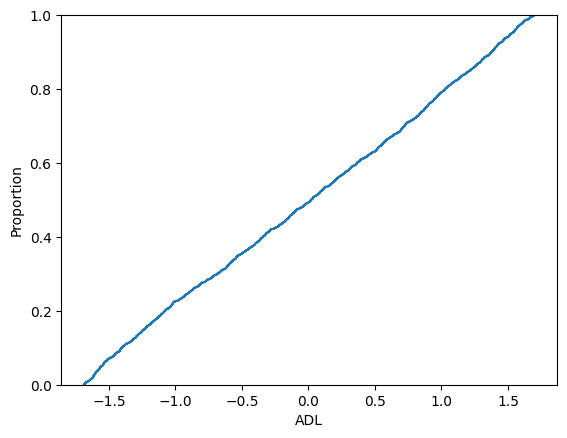

In [19]:
sns.ecdfplot(df["ADL"])

Uniform distribution

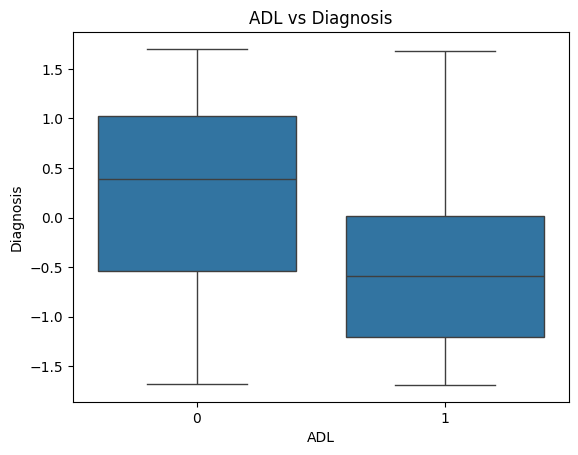

In [20]:
# ADL vs Diagnosis boxplot

sns.boxplot(x='Diagnosis', y='ADL', data=df)
plt.xlabel('ADL')
plt.ylabel('Diagnosis')
plt.title('ADL vs Diagnosis')
plt.show()

In [21]:
df.groupby('Diagnosis')['ADL'].median()

Diagnosis
0    0.390684
1   -0.592457
Name: ADL, dtype: float64

The median of the ADL score is higher in the no diagnosis group

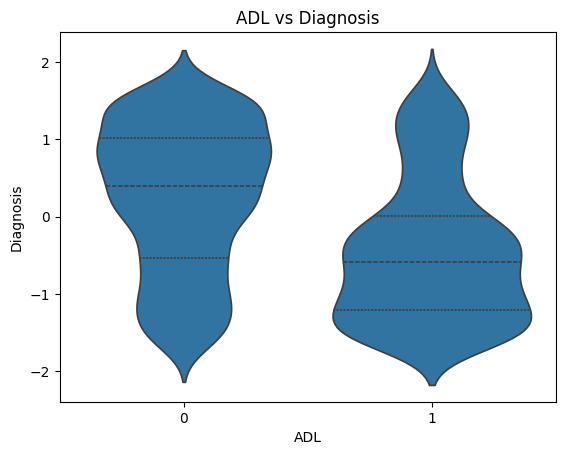

In [22]:
# Violin Plot
sns.violinplot(x='Diagnosis', y='ADL', data=df, inner='quartile')
plt.xlabel('ADL')
plt.ylabel('Diagnosis')
plt.title('ADL vs Diagnosis')
plt.show()

50% of patients diagnosed with Alzheimer's scored less than 4 on the ADL scale while 50% of patients who were not diagnosed with Alzheimer's scored above 6

#### All cognitive assessments seem relevant to determining Alzheimer's diagnosis

## Demographic Analysis

In [ ]:
# Age distribution
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')

Higher prevalence of patients older than 85

<Axes: xlabel='Age', ylabel='Proportion'>

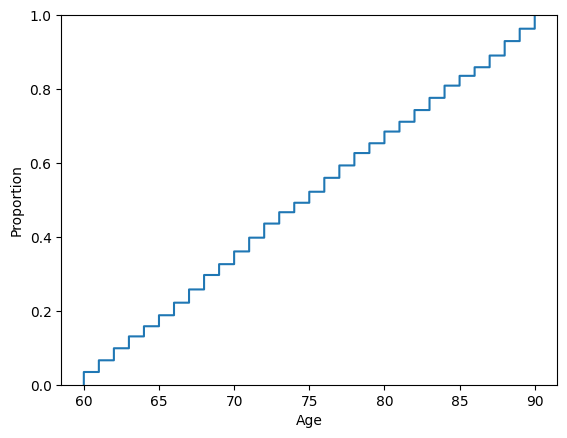

In [ ]:
sns.ecdfplot(df["Age"])

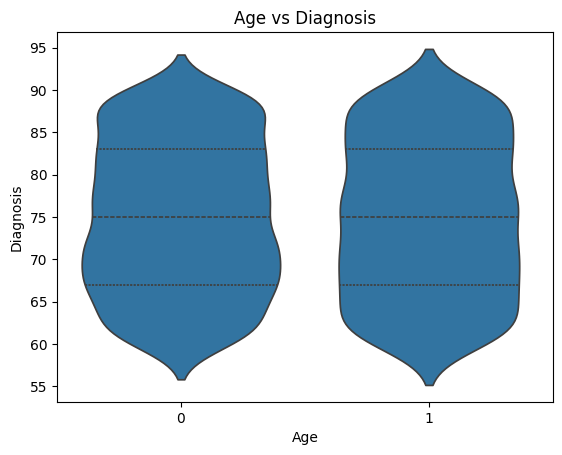

In [ ]:
# Violin Plot
sns.violinplot(x='Diagnosis', y='Age', data=df, inner='quartile')
plt.xlabel('Age')
plt.ylabel('Diagnosis')
plt.title('Age vs Diagnosis')
plt.show()

Very similar violin plots with a very similar median of 75 years. While alzheimer's increases with age, the data contains mostly older patients making this metric less relevant.

Text(0.5, 1.0, 'Gender')

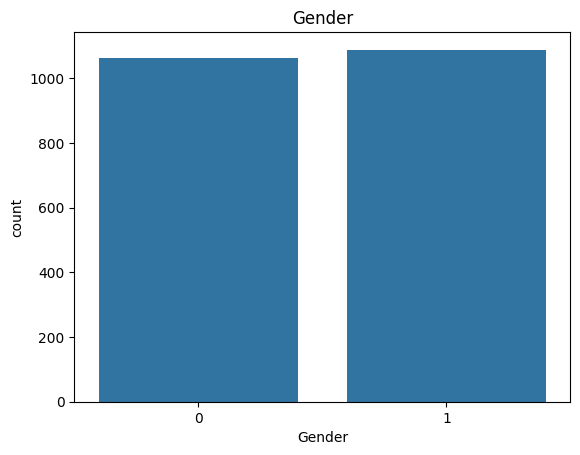

In [ ]:
# Gender distribution (uniform)
sns.countplot(x='Gender', data=df)
plt.title('Gender')

Text(0.5, 1.0, 'Gender vs Diagnosis')

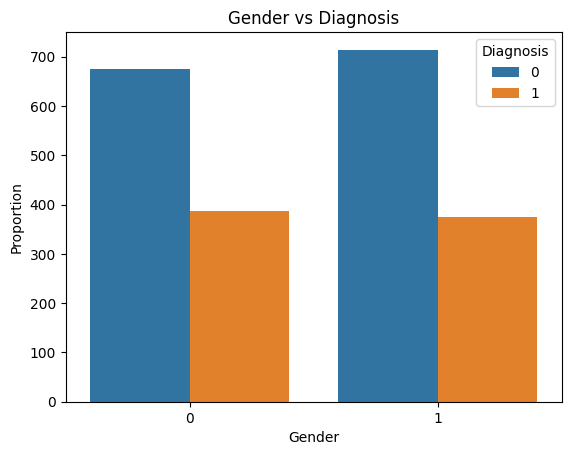

In [ ]:
# countplot with Diagnosis
sns.countplot(x='Gender', hue='Diagnosis', data=df)
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.title('Gender vs Diagnosis')

Very similar

Text(0.5, 1.0, 'Ethnicity')

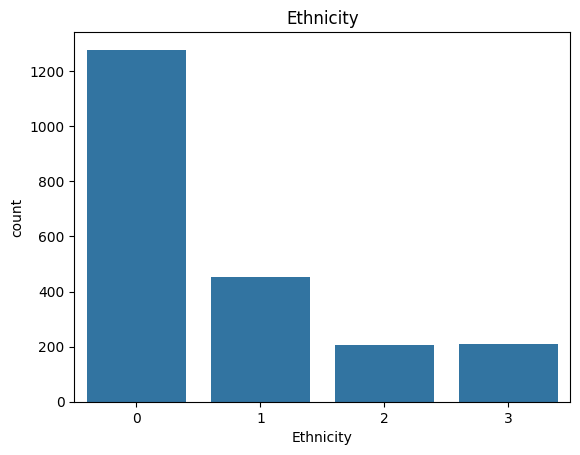

In [ ]:
# Ethnicity distribution
sns.countplot(x='Ethnicity', data=df)
plt.title('Ethnicity')

* 0: Caucasian  
* 1: African American  
* 2: Asian  
* 3: Other

More Caucasian data points the others

Text(0.5, 1.0, 'Ethnicity vs Diagnosis')

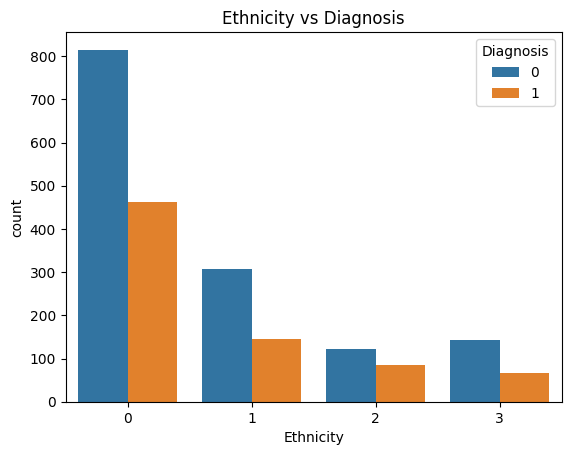

In [ ]:
# countplot with Diagnosis
sns.countplot(x='Ethnicity', hue='Diagnosis', data=df)
plt.title('Ethnicity vs Diagnosis')

There seems to be overall less patients in each race in the diagnosis group, but there is no information about certain races having higher diagnosis of alzheimer's due to the left leaning distribution.

Not much information about demographics in predicting diagnosis

## Lifestyle Factors

(array([208., 202., 207., 224., 210., 227., 214., 216., 220., 221.]),
 array([15.00885118, 17.50724281, 20.00563444, 22.50402607, 25.00241769,
        27.50080932, 29.99920095, 32.49759258, 34.99598421, 37.49437584,
        39.99276746]),
 <BarContainer object of 10 artists>)

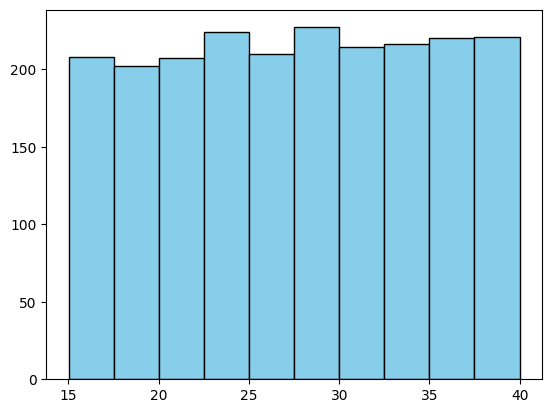

In [ ]:
# BMI Distribution
plt.hist(df['BMI'], bins=10, color='skyblue', edgecolor='black')

uniform

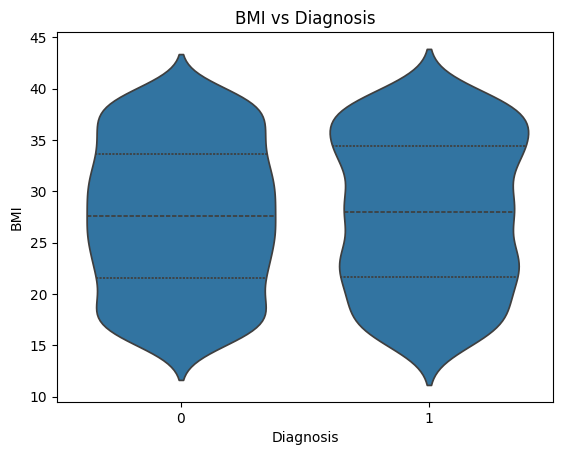

In [ ]:
# BMI violin plot

sns.violinplot(x='Diagnosis', y='BMI', data=df, inner='quartile')
plt.title('BMI vs Diagnosis')
plt.show()

Text(0.5, 1.0, 'Smoking')

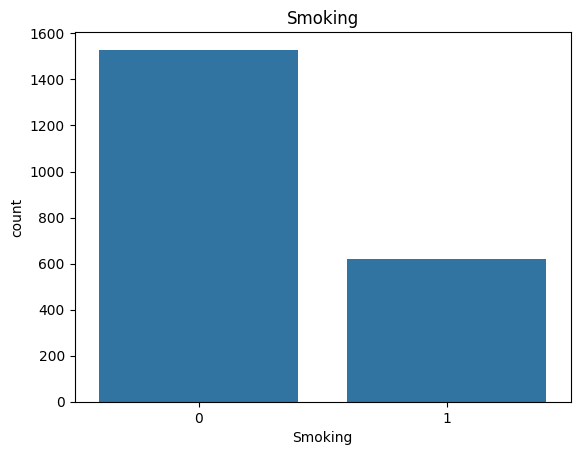

In [ ]:
# Smoking Distribution
sns.countplot(x='Smoking', data=df)
plt.title('Smoking')

More data points with patients who don't smoke

<Axes: xlabel='Smoking', ylabel='Diagnosis'>

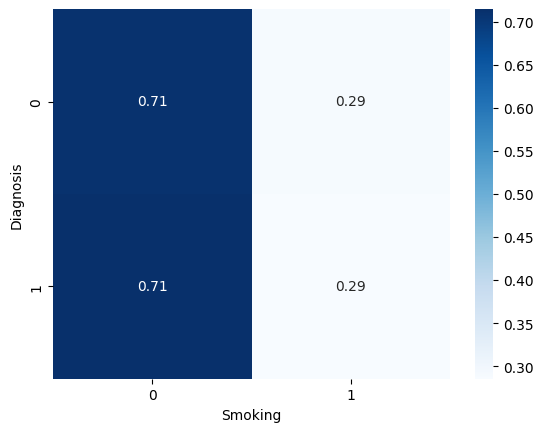

In [ ]:
# crosstab heatmap
cross = pd.crosstab(df["Diagnosis"], df["Smoking"], normalize="index")
sns.heatmap(cross, annot=True, fmt=".2f", cmap="Blues")

No useful information from smoking

(array([208., 199., 236., 218., 221., 211., 203., 210., 222., 221.]),
 array([2.00309914e-03, 2.00073213e+00, 3.99946115e+00, 5.99819018e+00,
        7.99691920e+00, 9.99564823e+00, 1.19943773e+01, 1.39931063e+01,
        1.59918353e+01, 1.79905643e+01, 1.99892934e+01]),
 <BarContainer object of 10 artists>)

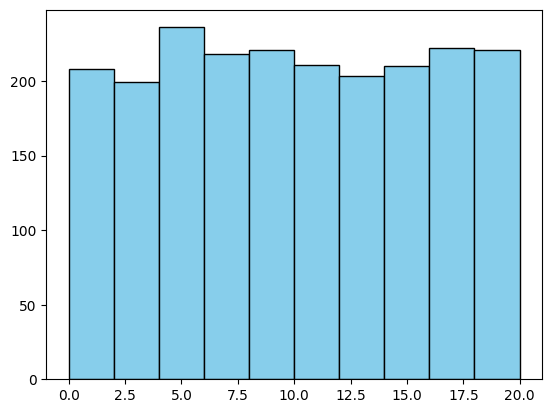

In [ ]:
# AlcoholConsumption Distribution
plt.hist(df['AlcoholConsumption'], bins=10, color='skyblue', edgecolor='black')

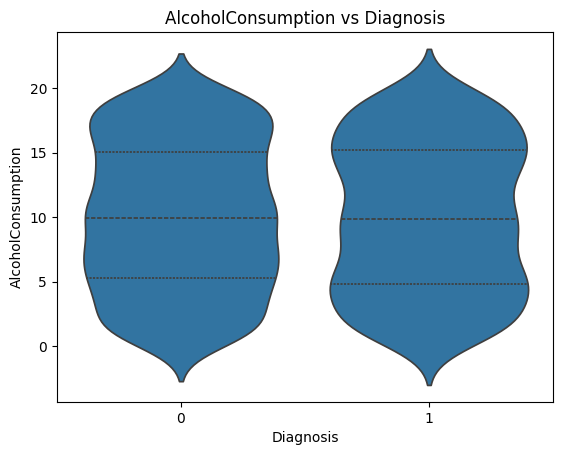

In [ ]:
# AlcoholConsumption violin plot

sns.violinplot(x='Diagnosis', y='AlcoholConsumption', data=df, inner='quartile')
plt.title('AlcoholConsumption vs Diagnosis')
plt.show()

In [ ]:
# create dataframe with just cognitive tests and target
model_df = df[['ADL', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'Diagnosis']]
model_df.head()


,ADL,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,Diagnosis
0,1.725883,21.463532,6.518877,0,0,0
1,2.592424,20.613267,7.118696,0,0,0
2,7.119548,7.356249,5.895077,0,0,0
3,6.481226,13.991127,8.965106,0,1,0
4,0.014691,13.517609,6.045039,0,0,0


In [ ]:
# Standardize ADL, MMSE, FunctionalAssessment

scale = preprocessing.StandardScaler()

cols = ['ADL', 'MMSE', 'FunctionalAssessment']
model_df[cols] = scale.fit_transform(model_df[cols])


#***Will: Further EDA***

In [24]:
# Read in original data before columns were dropped for modeling
data = pd.read_csv('../data/interim/alzheimers.csv')
data.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')

In [25]:
# Engineer "AgeCat" feature that turns a numerical age into a categorical one
def assign_age(x):
    if x >= 60 and x < 70:
        return "Old"
    elif x >= 70 and x < 80:
        return "Older"
    else:
        return "Oldest"
    
data['AgeCat'] = data['Age'].apply(assign_age)

In [26]:
# Sort patients by age group and check prevalence of Alzheimer's
data.groupby('AgeCat')['Diagnosis'].value_counts(normalize=True)

AgeCat  Diagnosis
Old     0            0.643367
        1            0.356633
Older   0            0.651494
        1            0.348506
Oldest  0            0.644295
        1            0.355705
Name: proportion, dtype: float64

Here, we can see that diagnosis frequency across age groups is relatively similar. We got a decent idea of this beforehand, but this gives a more concrete image of how age alone does not seem to reliably distinguish those with Alzheimer's and those without.

In [27]:
# Find proportion of patients of each sex
print(f"Male: {float((data['Gender'] == 0).sum())/len(data)*100}%")
print(f"Female: {float((data['Gender'] == 1).sum())/len(data)*100}%")

# Group by gender and Alzheimer's status
diagnosis_data = data.groupby(['Gender', 'Diagnosis']).size().unstack()
diagnosis_percentages = diagnosis_data.div(diagnosis_data.sum(axis = 1), axis = 0) * 100

# Print out the percentages for each gender
for g in diagnosis_percentages.index:
    print(f"Gender {g} Alzheimer's Proportion: {diagnosis_percentages.loc[g, 1]}%")

# Print out the overall population Alzheimer's proportion
print(f"Overall Alzheimer's Proportion: {diagnosis_percentages[1].mean()}%")

Male: 49.37180083759888%
Female: 50.628199162401124%
Gender 0 Alzheimer's Proportion: 36.380772855796415%
Gender 1 Alzheimer's Proportion: 34.375%
Overall Alzheimer's Proportion: 35.377886427898204%


The dataset is nearly perfectly split 50/50, though we can note that the males (Gender 0) have a slightly higher prevalence of Alzheimer's than females (Gender 1), though not by such a degree that we would want to use gender as a feature in our model.

In [29]:
# Determine the prevalence of family Alzheimer's history
data['FamilyHistoryAlzheimers'].value_counts(normalize=True)

# Group by family history and Alzheimer's status
diagnosis_data = data.groupby(['FamilyHistoryAlzheimers', 'Diagnosis']).size().unstack()
diagnosis_percentages = diagnosis_data.div(diagnosis_data.sum(axis = 1), axis = 0) * 100

# Print out the percentages for each family history group
for f in diagnosis_percentages.index:
    print(f"Family History {f} Alzheimer's Proportion: {diagnosis_percentages.loc[f, 1]:.2f}%")

# Print out the overall population family history relevance
print(f"Overall Population Family History Relevance: {data['FamilyHistoryAlzheimers'].sum()/len(data) * 100:.2f}%")

Family History 0 Alzheimer's Proportion: 36.28%
Family History 1 Alzheimer's Proportion: 32.66%
Overall Population Family History Relevance: 25.22%


Really interesting thing to note here: There was a higher prevalence of Alzheimer's in the group who did NOT have a family history by a somewhat sizeable margin. Not sure if this is just me, but this acts against what I would expect the result to be. Maybe we can highlight this in our slides and show how our expectations may not hold up when we inspect what the data actually show.

In [30]:
# Determine the prevalence of forgetfulness
data['Forgetfulness'].value_counts(normalize=True)

# Group by forgetfulness and Alzheimer's status
diagnosis_data = data.groupby(['Forgetfulness', 'Diagnosis']).size().unstack()
diagnosis_percentages = diagnosis_data.div(diagnosis_data.sum(axis = 1), axis = 0) * 100

# Print out the percentages for each forgetfulness group
for f in diagnosis_percentages.index:
    print(f"Forgetfulness {f} Alzheimer's Proportion: {diagnosis_percentages.loc[f, 1]:.2f}%")

# Print out the overall population forgetfulness relevance
print(f"Overall Population Forgetfulness Relevance: {data['Forgetfulness'].sum()/len(data) * 100:.2f}%")

Forgetfulness 0 Alzheimer's Proportion: 35.38%
Forgetfulness 1 Alzheimer's Proportion: 35.34%
Overall Population Forgetfulness Relevance: 30.15%


Here, it looks like forgetfulness is not a useful predictor of Alzheimer's whatsoever; the proportions are almost the exact same.

In [31]:
# Determine the prevalence of depression
data['Depression'].value_counts(normalize=True)

# Group by depression and Alzheimer's status
diagnosis_data = data.groupby(['Depression', 'Diagnosis']).size().unstack()
diagnosis_percentages = diagnosis_data.div(diagnosis_data.sum(axis = 1), axis = 0) * 100

# Print out the percentages for each depression group
for f in diagnosis_percentages.index:
    print(f"Depression {f} Alzheimer's Proportion: {diagnosis_percentages.loc[f, 1]:.2f}%")

# Print out the overall population depression relevance
print(f"Overall Population Depression Relevance: {data['Depression'].sum()/len(data) * 100:.2f}%")

Depression 0 Alzheimer's Proportion: 35.51%
Depression 1 Alzheimer's Proportion: 34.80%
Overall Population Depression Relevance: 20.06%


Again, we find another variable that does not play whatsoever.

In [32]:
# Determine the prevalence of personality changes
data['PersonalityChanges'].value_counts(normalize=True)

# Group by personality changes and Alzheimer's status
diagnosis_data = data.groupby(['PersonalityChanges', 'Diagnosis']).size().unstack()
diagnosis_percentages = diagnosis_data.div(diagnosis_data.sum(axis = 1), axis = 0) * 100

# Print out the percentages for each personality change group
for f in diagnosis_percentages.index:
    print(f"Personality Changes {f} Alzheimer's Proportion: {diagnosis_percentages.loc[f, 1]:.2f}%")

# Print out the overall population personality change relevance
print(f"Overall Population Personality Change Relevance: {data['PersonalityChanges'].sum()/len(data) * 100:.2f}%")

Personality Changes 0 Alzheimer's Proportion: 35.78%
Personality Changes 1 Alzheimer's Proportion: 33.02%
Overall Population Personality Change Relevance: 15.08%


Interesting takeaway: Alzheimer's is more prevalent in patients who did NOT experience personality changes than those who did. This goes against expectations and may be another interesting finding to highlight.

In [ ]:
# Create input and target dataframes/arrays
# We drop AgeCat here because it is derived from Age, which is already included
X_data = data.drop(columns = ['Diagnosis', 'AgeCat'])
y_data = data['Diagnosis']

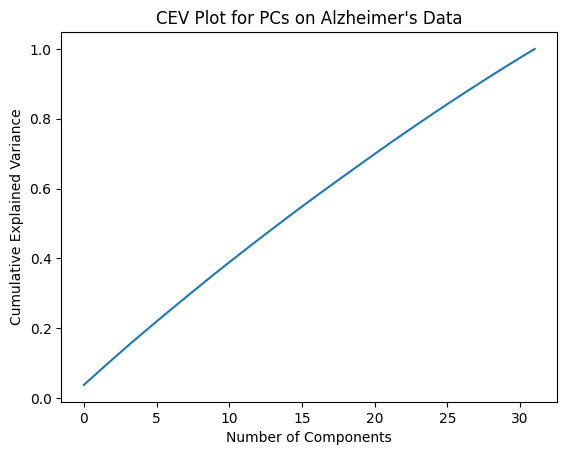

In [ ]:
# Encode categorical variables
X_data = pd.get_dummies(X_data, drop_first = True)

# Standardize the features
pca_scaler = StandardScaler()
X_scaled = pca_scaler.fit_transform(X_data)

# Run the PCA algorithm
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Determine how many PCs we need based on variance explanation threshold
# We do this by plotting a cumulative density plot of explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("CEV Plot for PCs on Alzheimer's Data")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

It appears that the first 25 or so principal components would be sufficient to explain ~80% of the variation in the data.
This would be useful if we were focused particularly on reducing the dimensionality of the data, though I doubt that we
will put such an emphasis on model efficiency that we would do such a thing.

However, we can touch on the fact that dimensionality reduction techniques, which may be appealing to executives at large
hospitals or healthcare companies, lose accuracy by design. This focus on efficiency can compromise best practice, and
in the case of a very complex and hard-to-define disease (in terms of causes), obscuring patient data further can
be risky.

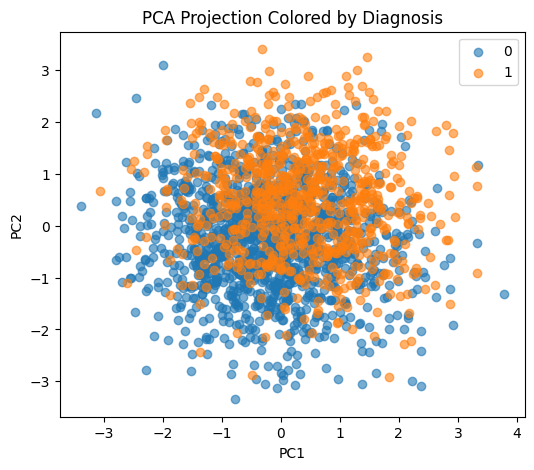

In [ ]:
# Plot the first two Principal Components, stratified by diagnosis status
plt.figure(figsize=(6, 5))
for label in y_data.unique():
    plt.scatter(
        X_pca[y_data == label, 0],
        X_pca[y_data == label, 1],
        label=label,
        alpha=0.6
    )

# Label the plot and print it
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.title("PCA Projection Colored by Diagnosis")
plt.show()

We can see a slight difference in the clustering of orange and blue (diagnosis vs. no diagnosis)
data points, meaning that while these two principal components cannot fully distinguish these two
groups (or really get all that close, even), plotting the points on these two axes does do something to
create a distinction between patients with and without Alzheimer's.

In [ ]:
# Define the loadings for each feature on each Principal Component
loadings = pd.DataFrame(
    pca.components_.T,
    index=X_data.columns,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)]
)

# Show the top-contributing features for PC1
loadings["PC1"].sort_values(ascending=False).head(10)

Smoking                      0.379862
CardiovascularDisease        0.339457
MemoryComplaints             0.270904
DifficultyCompletingTasks    0.256496
Ethnicity                    0.193867
Age                          0.173020
CholesterolLDL               0.150194
Confusion                    0.109909
Gender                       0.079069
PhysicalActivity             0.077077
Name: PC1, dtype: float64

In [ ]:
# Show the top-contributing features for PC2
loadings["PC2"].sort_values(ascending=False).head(10)

BMI                         0.334995
CholesterolHDL              0.240236
Smoking                     0.196015
BehavioralProblems          0.195792
DiastolicBP                 0.151453
Forgetfulness               0.147376
PhysicalActivity            0.119945
MemoryComplaints            0.116351
CholesterolTriglycerides    0.114792
Age                         0.077398
Name: PC2, dtype: float64

#*Here's what we can take away from this:*
A combination of the following factors:
* Smoking (0.38)
* Cardiovascular Disease (0.34)
* Memory Complaints (0.27)
* Difficulty Completing Tasks (0.26)

is our best (although relatively weak) predictor of Alzheimer's diagnosis.

A combination of these factors:
* BMI (0.33)
* CholesterolHDL (0.24)
* Smoking (0.20)
* Behavioral Problems (0.20)

is our second-best predictor of Alzheimer's disease being diagnosed in our data.

What this means is that these factors, which are a mix of lifestyle choices, comorbid disease,
and what are expected symptoms of Alzheimer's Disease, all co-correlate with a diagnosis to some degree
WHEN TAKEN IN TANDEM. We need to consider their co-influence.

We cannot isolate a single main predictor that far-and-away explains Alzheimer's risk. No
obvious line can be drawn to say, "these people will have the disease and these people won't,"
which is to be expected from a multi-factor ailment like this.

These findings can inform our decisions on what factors we want to feed into our model and what
factors we want to look into further in our EDA process.

In [ ]:
# import into clean data folder
model_df.to_csv('../data/clean/alzheimers.csv', index=False)